<a href="https://colab.research.google.com/github/DambaniDeborah/DambaniDeborah/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question 1: Apply xyplot to this lesson’s data set (dat) to show how the response varies with
#exposure within each dose group. Does exposure explain much of the variation in
#response, beyond what is already explained by dose?

In [28]:
#create dataframe
nsubj<- 40
doses<- c(0, 10, 30,100)
times<- seq(0,9,3)
dat<- expand.grid(Subject= 1:nsubj, Month= times)
dat<- as.data.frame(dat)
dat$Dose<- doses[as.numeric(dat$Subject) %% length(doses)+1]
dat$Exposure<- dat$Dose * exp(rnorm(nrow(dat), 0, 0.3))
noise<- rep(rnorm(nsubj, 0, 0.2), length(doses))+ rnorm(nrow(
  dat), 0,0.2)
emax<- c(0,50,100, 100)[match(dat$Month, times)]
dat$Response<- with(dat, 10+ emax* Exposure/ (Exposure +25))*
  exp(noise)
dat$Response <- pmin(dat$Response, 100)

In [1]:
#activate lattice package
library(lattice)

In [3]:
#Explore dataset
head(dat)
str(dat)
summary(dat)

,Subject,Month,Dose,Exposure,Response
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,10,8.299817,7.237663
2,2,0,30,32.557640,10.070825
3,3,0,100,101.678941,10.492727
4,4,0,0,0.000000,7.432249
5,5,0,10,8.737620,11.733094
6,6,0,30,42.870478,11.864144


'data.frame':	160 obs. of  5 variables:
 $ Subject : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Dose    : num  10 30 100 0 10 30 100 0 10 30 ...
 $ Exposure: num  8.3 32.56 101.68 0 8.74 ...
 $ Response: num  7.24 10.07 10.49 7.43 11.73 ...
 - attr(*, "out.attrs")=List of 2
  ..$ dim     : Named int [1:2] 40 4
  .. ..- attr(*, "names")= chr [1:2] "Subject" "Month"
  ..$ dimnames:List of 2
  .. ..$ Subject: chr [1:40] "Subject= 1" "Subject= 2" "Subject= 3" "Subject= 4" ...
  .. ..$ Month  : chr [1:4] "Month=0" "Month=3" "Month=6" "Month=9"


    Subject          Month           Dose          Exposure      
 Min.   : 1.00   Min.   :0.00   Min.   :  0.0   Min.   :  0.000  
 1st Qu.:10.75   1st Qu.:2.25   1st Qu.:  7.5   1st Qu.:  3.929  
 Median :20.50   Median :4.50   Median : 20.0   Median : 17.481  
 Mean   :20.50   Mean   :4.50   Mean   : 35.0   Mean   : 37.744  
 3rd Qu.:30.25   3rd Qu.:6.75   3rd Qu.: 47.5   3rd Qu.: 49.051  
 Max.   :40.00   Max.   :9.00   Max.   :100.0   Max.   :175.270  
    Response      
 Min.   :  5.248  
 1st Qu.: 10.152  
 Median : 28.565  
 Mean   : 36.086  
 3rd Qu.: 58.291  
 Max.   :100.000  

In [29]:

dat$Dose2<- paste(dat$Dose, 'mg')


In [30]:
dat$Dose2[dat$Dose2 == '0 mg'] <- 'Placebo'

In [31]:
head(dat$Dose2)

[1] "10 mg"   "30 mg"   "100 mg"  "Placebo" "10 mg"   "30 mg"

In [40]:
dat$Dose2<- factor(dat$Dose2)

In [41]:
levels(dat$Dose2)

[1] "10 mg"   "100 mg"  "30 mg"   "Placebo"

In [42]:
#subscripting to permute factor level
newlevel<-levels(dat$Dose2)[c(4,1,3,2)]
newlevel

[1] "Placebo" "10 mg"   "30 mg"   "100 mg"

In [43]:
dat$Dose2 <- factor(dat$Dose2, levels = newlevel)

In [44]:
levels(dat$Dose2)

[1] "Placebo" "10 mg"   "30 mg"   "100 mg"

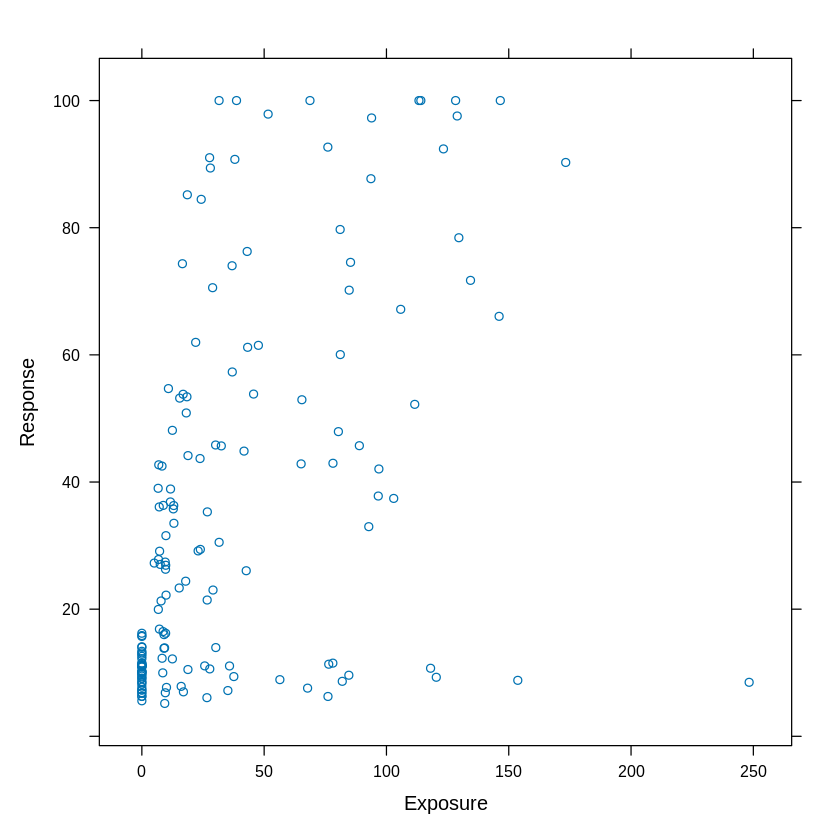

In [45]:
#plot1
xyplot(data= dat, Response~Exposure)

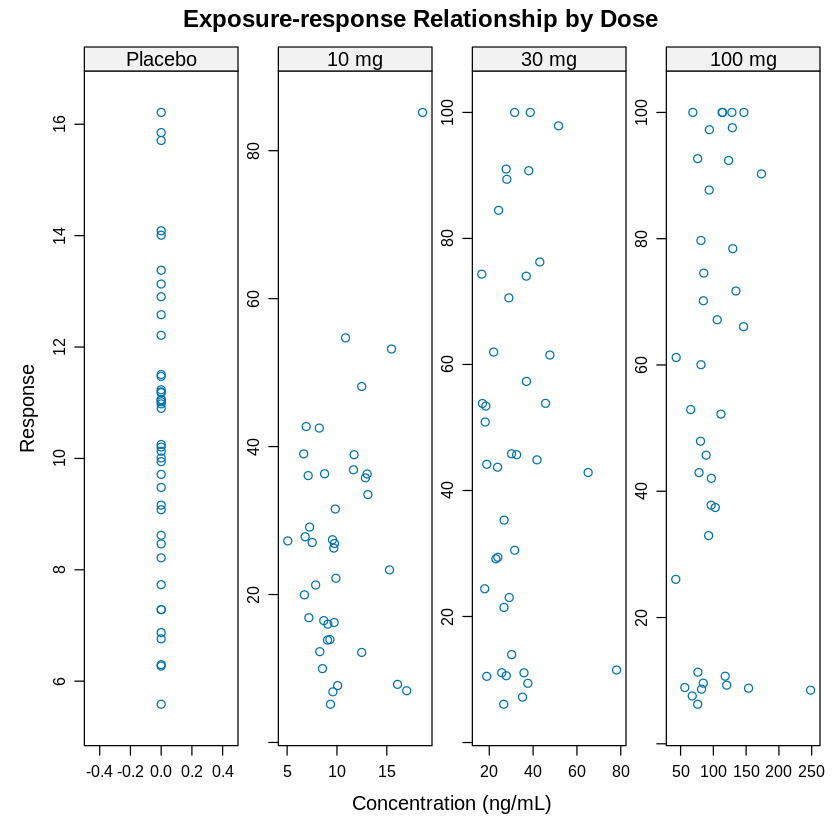

In [50]:
#plot2
xyplot(data= dat, Response~Exposure|Dose2, layout = c(4,1),
main= 'Exposure-response Relationship by Dose',
xlab= 'Concentration (ng/mL)',
scale= list(relation= 'free'))


In [ ]:
#Question 2: Make the same plot as previously, but using only data from month nine. Add a title to
#your plot that says “Month 9 Data Only”.

In [59]:
#Month 9 Data only

dat2<- dat[dat$Month == 9,]



In [60]:
is.data.frame(dat2)

[1] TRUE

In [61]:
#explore dataset
head(dat2)
str(dat2)
summary(dat2)

,Subject,Month,Dose,Exposure,Response,Dose2
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121,1,9,10,8.229478,42.50448,10 mg
122,2,9,30,18.426123,53.40142,30 mg
123,3,9,100,68.732233,100.00000,100 mg
124,4,9,0,0.000000,11.19436,Placebo
125,5,9,10,15.269093,23.33037,10 mg
126,6,9,30,16.582183,74.33585,30 mg


'data.frame':	40 obs. of  6 variables:
 $ Subject : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month   : num  9 9 9 9 9 9 9 9 9 9 ...
 $ Dose    : num  10 30 100 0 10 30 100 0 10 30 ...
 $ Exposure: num  8.23 18.43 68.73 0 15.27 ...
 $ Response: num  42.5 53.4 100 11.2 23.3 ...
 $ Dose2   : Factor w/ 4 levels "Placebo","10 mg",..: 2 3 4 1 2 3 4 1 2 3 ...
 - attr(*, "out.attrs")=List of 2
  ..$ dim     : Named int [1:2] 40 4
  .. ..- attr(*, "names")= chr [1:2] "Subject" "Month"
  ..$ dimnames:List of 2
  .. ..$ Subject: chr [1:40] "Subject= 1" "Subject= 2" "Subject= 3" "Subject= 4" ...
  .. ..$ Month  : chr [1:4] "Month=0" "Month=3" "Month=6" "Month=9"


    Subject          Month        Dose          Exposure      
 Min.   : 1.00   Min.   :9   Min.   :  0.0   Min.   :  0.000  
 1st Qu.:10.75   1st Qu.:9   1st Qu.:  7.5   1st Qu.:  5.441  
 Median :20.50   Median :9   Median : 20.0   Median : 17.504  
 Mean   :20.50   Mean   :9   Mean   : 35.0   Mean   : 37.968  
 3rd Qu.:30.25   3rd Qu.:9   3rd Qu.: 47.5   3rd Qu.: 55.899  
 Max.   :40.00   Max.   :9   Max.   :100.0   Max.   :146.544  
    Response           Dose2   
 Min.   :  6.297   Placebo:10  
 1st Qu.: 21.000   10 mg  :10  
 Median : 49.507   30 mg  :10  
 Mean   : 50.230   100 mg :10  
 3rd Qu.: 75.518               
 Max.   :100.000               

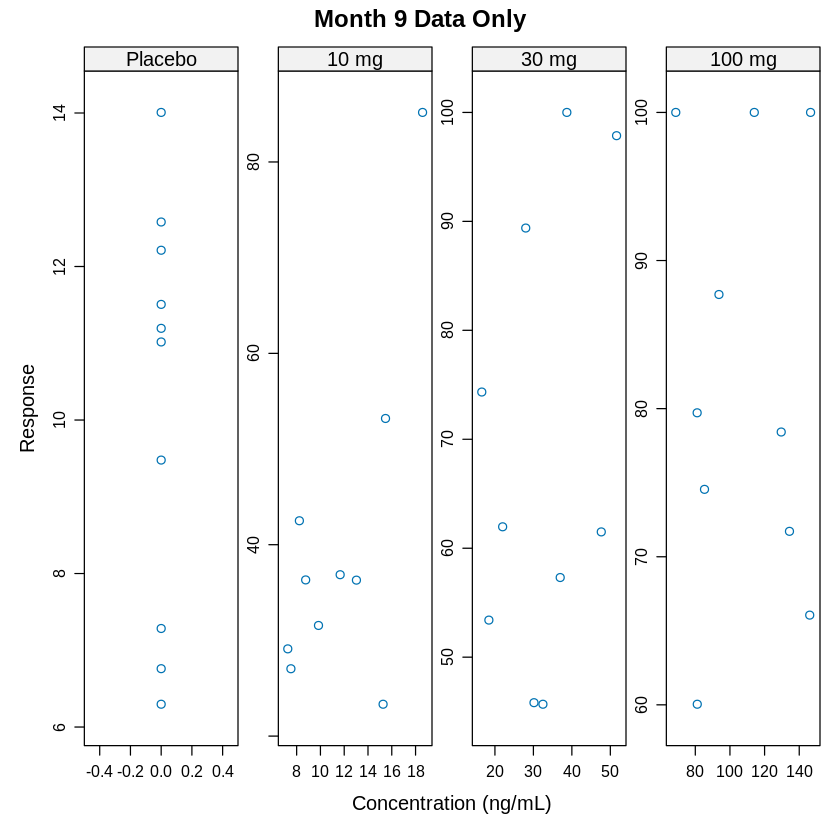

In [62]:
#plot 3
xyplot(data= dat2, Response~Exposure|Dose2, layout = c(4,1),
main= 'Month 9 Data Only',
xlab= 'Concentration (ng/mL)',
scale= list(relation= 'free'))

In [ ]:
#Question 3: Save the plot you just made as a 3 inch by 3 inch figure in pdf format (we haven’t
#discussed how to specify the plotting dimensions — you will need to search for help
#on the pdf() function

In [64]:
#plot 4
pdf(file= 'Homework.pdf', width= 3, height = 3)
xyplot(data= dat2, Response~Exposure|Dose2, layout = c(4,1),
main= 'Month 9 Data Only',
xlab= 'Concentration (ng/mL)',
scale= list(relation= 'free'))
dev.off()

png 
  2

In [65]:
#plot 5
pdf(file= 'plot2.pdf', width= 10, height = 3)
xyplot(data= dat2, Response~Exposure|Dose2, layout = c(4,1),
main= 'Month 9 Data Only',
xlab= 'Concentration (ng/mL)',
scale= list(relation= 'free'))
dev.off()

png 
  2